## 符号表示
| 通用符号 | 描述 | Python |
|:---------|:------------------------------------------------------------|:---------------------|
| \(a) | 标量，非加粗 | |
| \($\mathbf{a}$) | 向量，加粗 | |
| **回归** | | | |
| \($\mathbf{x}$) | 训练样本特征值（本实验为房屋面积，单位为 1000 平方英尺） | `x_train` |
| \($\mathbf{y}$) | 训练样本目标值（本实验为房屋价格，单位为 1000 美元） | `y_train` |
| \($x^{(i)}, y^{(i)}$) | 第 \( i \) 个训练样本 | `x_i`, `y_i` |
| \( m \) | 训练样本数量 | `m` |
| \( w \) | 参数：权重 | `w` |
| \( b \) | 参数：偏置 | `b` |
| \($f_{w,b}(x^{(i)})$) | 模型在 \($x^{(i)}$) 处的计算结果，参数为 \( w \) 和 \( b \)：\($f_{w,b}(x^{(i)}) = wx^{(i)} + b $) | `f_wb` |

#### 使用一个简单的数据集，仅包含两个数据点——一个 1000 平方英尺的房子售价为 300,000 美元，一个 2000 平方英尺的房子售价为 500,000 美元。这两个点将构成 *数据集或训练集*。

| 面积(1000平方英尺) | 价格(1000 美元)|
|---------------------|------------------|
| 1.0                 | 300              |
| 2.0                 | 500              |

In [1]:
import numpy as np
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


### 训练样本数量 \( m \)
使用 \( m \) 来表示训练样本的数量。NumPy 数组有一个 `.shape` 属性。`x_train.shape` 返回一个 Python 元组，每个维度都有一个条目。`x_train.shape[0]` 是数组的长度，也是样本的数量。

In [2]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
n = len(x_train)
print(f"训练样本数量为：{m} 或 {n}")

x_train.shape: (2,)
训练样本数量为：2 或 2


### 训练样本 \( x_i, y_i \)
使用 \($ (x^{(i)}, y^{(i)}) $) 来表示第 \( i \) 个训练样本。由于 Python 是从零开始索引的，因此 \($ (x^{(0)}, y^{(0)}) $) 是 (1.0, 300.0)，而 \( ($x^{(1)}, y^{(1)}) $) 是 (2.0, 500.0)。  
要访问 NumPy 数组中的值，可以使用所需的偏移量对数组进行索引。例如，访问 `x_train` 的第零个位置的语法是 `x_train[0]`。

In [3]:
i = 0  
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### 绘制数据
使用 `matplotlib` 库中的 `scatter()` 函数绘制这两个点，如下所示。  
- 函数参数 `marker` 和 `c` 将点显示为红色叉号（默认为蓝色点）。

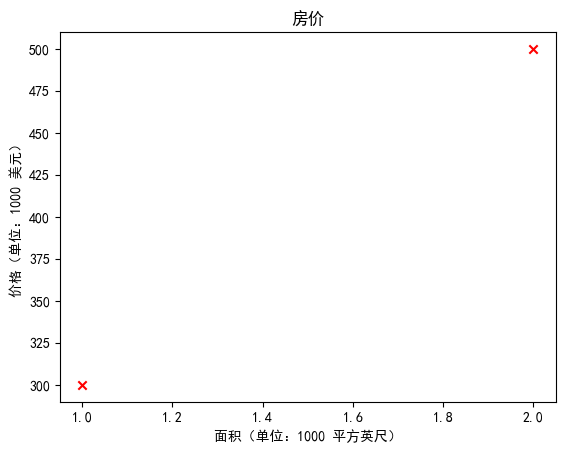

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("房价")
plt.ylabel('价格（单位：1000 美元）')
plt.xlabel('面积（单位：1000 平方英尺）')
plt.show()

## 模型函数
线性回归的模型函数（将 `x` 映射到 `y` 的函数）表示为

\[$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $]

对于大量的数据点，过程会变得繁琐和重复。因此，使用 `for` 循环来计算函数输出，如下所示的 `compute_model_output` 函数。

> **注意**：参数描述 `(ndarray (m,))` 描述了一个形状为 `(m,)` 的 NumPy 多维数组。`(scalar)` 描述了一个没有维度的参数，只有大小。  
> **注意**：`np.zeros(n)` 将返回一个包含 \( n \) 个条目的一维 NumPy 数组。


In [5]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

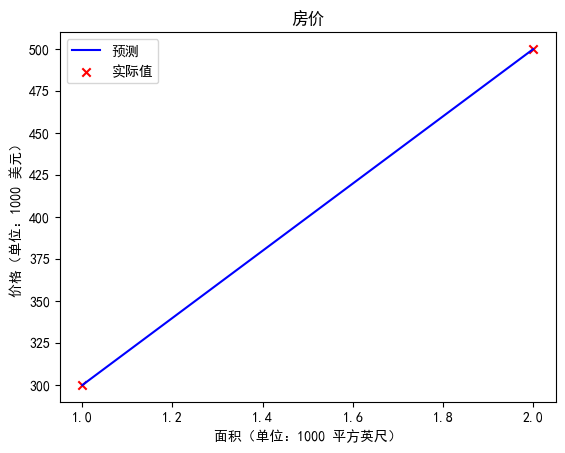

In [6]:
w = 200
b = 100
tmp_f_wb = compute_model_output(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c='b', label='预测')

plt.scatter(x_train, y_train, marker='x', c='r', label='实际值')

plt.title("房价")
plt.ylabel('价格（单位：1000 美元）')
plt.xlabel('面积（单位：1000 平方英尺）')
plt.legend()
plt.show()

### 进行预测

In [7]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} 千美元")

$340 千美元
